# Load Simple Workflow

## Plot

In [1]:
from python_workflow_definition.plot import plot

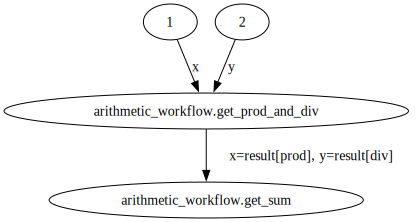

In [2]:
plot(file_name='workflow_arithmetic.json')

## Aiida 

In [3]:
from python_workflow_definition.aiida import load_workflow_json

from aiida import load_profile
load_profile()

Profile<uuid='5b8a8d98b3014876a9eed7d85a954e5e' name='pwd'>

In [4]:
workgraph = load_workflow_json(file_name='workflow_arithmetic.json')

In [5]:
# TODO: Create inputs rather than tasks out of data nodes
workgraph

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [6]:

workgraph.run()

04/23/2025 09:51:40 AM <5717> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [273|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_prod_and_div1
04/23/2025 09:51:40 AM <5717> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [273|WorkGraphEngine|update_task_state]: Task: get_prod_and_div1, type: PyFunction, finished.
04/23/2025 09:51:40 AM <5717> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [273|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_sum2
04/23/2025 09:51:41 AM <5717> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [273|WorkGraphEngine|update_task_state]: Task: get_sum2, type: PyFunction, finished.
04/23/2025 09:51:41 AM <5717> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [273|WorkGraphEngine|continue_workgraph]: tasks ready to run: 
04/23/2025 09:51:41 AM <5717> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [273|WorkGraphEngine|fina

## executorlib

In [7]:
from executorlib import SingleNodeExecutor

In [8]:
from python_workflow_definition.executorlib import load_workflow_json

In [9]:
with SingleNodeExecutor(max_workers=1) as exe:
    result = load_workflow_json(file_name="workflow_arithmetic.json", exe=exe).result()

In [10]:
result

2.5

## Jobflow

In [11]:
from jobflow.managers.local import run_locally

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [12]:
from python_workflow_definition.jobflow import load_workflow_json

In [13]:
flow = load_workflow_json(file_name="workflow_arithmetic.json")

In [14]:
result = run_locally(flow)
result

2025-04-23 09:51:44,679 INFO Started executing jobs locally
2025-04-23 09:51:44,779 INFO Starting job - get_prod_and_div (51955f11-032f-4a6d-b643-c4fc87967298)
2025-04-23 09:51:44,782 INFO Finished job - get_prod_and_div (51955f11-032f-4a6d-b643-c4fc87967298)
2025-04-23 09:51:44,782 INFO Starting job - get_sum (3ed0bbc7-babb-475a-be16-2cdfe4c0c583)
2025-04-23 09:51:44,784 INFO Finished job - get_sum (3ed0bbc7-babb-475a-be16-2cdfe4c0c583)
2025-04-23 09:51:44,784 INFO Finished executing jobs locally


{'51955f11-032f-4a6d-b643-c4fc87967298': {1: Response(output={'prod': 2, 'div': 0.5}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 '3ed0bbc7-babb-475a-be16-2cdfe4c0c583': {1: Response(output=2.5, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))}}

## pyiron

In [15]:
from python_workflow_definition.pyiron_base import load_workflow_json

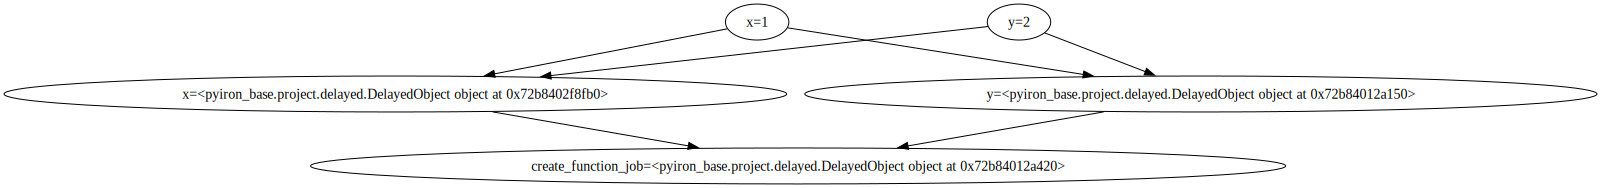

In [16]:
delayed_object_lst = load_workflow_json(file_name="workflow_arithmetic.json")
delayed_object_lst[-1].draw()

In [17]:
delayed_object_lst[-1].pull()

The job get_prod_and_div_955f44280fa0072653e4d910a57d7b92 was saved and received the ID: 1
The job get_sum_55b699570ac3c74e1e8078a45b657240 was saved and received the ID: 2


2.5

## Python

In [18]:
from python_workflow_definition.purepython import load_workflow_json

In [19]:
load_workflow_json(file_name="workflow_arithmetic.json")

2.5